In [1]:
pip install -U pip scikit-learn pandas numpy matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv('data.csv')

In [4]:
df.head(5)

,Title,Author,Total Karma,Comment Karma,Cake Day,Post URL,Created Time,Upvotes,Upvote Ratio,Number of Comments,Category,Time of Day,File Name,Extracted Text
0,Meta Discussion Thread #52,SachiMod,77774,5245,24-05-2019,https://i.redd.it/oduf9ys9nbse1.png,02-04-2025 01:14,82,0.86,13,Animemes,Night,1_SachiMod_Animemes.png,Wow THAT Appil Fools Event SuRe WAS ~Comment Y...
1,Those options,GroovyChirpy,1018334,146595,07-02-2022,https://i.redd.it/265srqkh2tse1.jpeg,04-04-2025 11:42,8193,0.95,165,Animemes,Morning,2_GroovyChirpy_Animemes.jpeg,SELECT OKiss between her fingersi OKiss her be...
2,Boys vs Girls: Photos,kf1035,558040,8771,15-06-2023,https://i.redd.it/2euvpcwnftse1.jpeg,04-04-2025 12:56,2114,0.99,15,Animemes,Afternoon,3_kf1035_Animemes.jpeg,{i133 E yeariofftiendship 300+ photos Broandme...
3,"""You wouldn't say anything to me, nor me to yo...",KaySan-TheBrightStar,134918,26349,30-09-2024,https://i.redd.it/pmseatf01use1.jpeg,04-04-2025 14:56,672,0.99,21,Animemes,Afternoon,4_KaySanTheBrightStar_Animemes.jpeg,Mezbeingactiveli multiplefandoms Userlrecogniz...
4,Pls give her seratonin,Jackabing,1647368,4594,28-06-2024,https://i.redd.it/qb67m7labuse1.jpeg,04-04-2025 15:54,512,0.98,29,Animemes,Afternoon,5_Jackabing_Animemes.jpeg,DO YOU HAVE SOME SPARE SEROTONI PQEASE I BEG you


In [5]:
print(df.shape)

(4821, 14)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4821 entries, 0 to 4820
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               4821 non-null   object 
 1   Author              4821 non-null   object 
 2   Total Karma         4821 non-null   int64  
 3   Comment Karma       4821 non-null   int64  
 4   Cake Day            4821 non-null   object 
 5   Post URL            4821 non-null   object 
 6   Created Time        4821 non-null   object 
 7   Upvotes             4821 non-null   int64  
 8   Upvote Ratio        4821 non-null   float64
 9   Number of Comments  4821 non-null   int64  
 10  Category            4821 non-null   object 
 11  Time of Day         4821 non-null   object 
 12  File Name           4821 non-null   object 
 13  Extracted Text      4821 non-null   object 
dtypes: float64(1), int64(4), object(9)
memory usage: 527.4+ KB


In [7]:
df.describe()

,Total Karma,Comment Karma,Upvotes,Upvote Ratio,Number of Comments
count,4.821000e+03,4.821000e+03,4821.000000,4821.000000,4821.000000
mean,4.004947e+05,4.201271e+04,1504.467745,0.891769,30.160548
std,1.643652e+06,1.247274e+05,3537.941464,0.156676,69.752853
min,1.000000e+00,-1.000000e+02,0.000000,0.090000,0.000000
25%,1.231200e+04,1.369000e+03,44.000000,0.880000,3.000000
50%,5.541500e+04,6.919000e+03,240.000000,0.960000,9.000000
75%,1.691530e+05,3.040100e+04,1202.000000,0.980000,29.000000
max,1.297404e+07,2.801218e+06,62256.000000,1.000000,1645.000000


In [8]:
df.value_counts()

Title                                          Author                Total Karma  Comment Karma  Cake Day    Post URL                              Created Time      Upvotes  Upvote Ratio  Number of Comments  Category          Time of Day  File Name                                      Extracted Text                                                                                                                                                                                                                                                                                                                                
 I was just trying to enjoy my morning coffee  superspak             27551        5235           27-01-2011  https://i.redd.it/w2z7epoqnrpd1.jpeg  19-09-2024 13:17  2649     0.99          106                 engineeringmemes  Afternoon    252_superspak_engineeringmemes.jpeg            Getting excited to learn about engineering disasters                                         

In [9]:
df.isnull().sum()

Title                 0
Author                0
Total Karma           0
Comment Karma         0
Cake Day              0
Post URL              0
Created Time          0
Upvotes               0
Upvote Ratio          0
Number of Comments    0
Category              0
Time of Day           0
File Name             0
Extracted Text        0
dtype: int64

In [10]:
df['log_upvotes'] = np.log1p(df['Upvotes'])

In [11]:
# Caption length
df['caption_length'] = df['Title'].apply(lambda x: len(str(x)))

# Virality label: based on upvotes (you can define thresholds)
def label_virality(upvotes):
    if upvotes < 100:
        return 'low'
    elif upvotes < 1000:
        return 'medium'
    else:
        return 'high'

df['virality'] = df['Upvotes'].apply(label_virality)

In [12]:
df['log_caption_length'] = np.log1p(df['caption_length'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4821 entries, 0 to 4820
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               4821 non-null   object 
 1   Author              4821 non-null   object 
 2   Total Karma         4821 non-null   int64  
 3   Comment Karma       4821 non-null   int64  
 4   Cake Day            4821 non-null   object 
 5   Post URL            4821 non-null   object 
 6   Created Time        4821 non-null   object 
 7   Upvotes             4821 non-null   int64  
 8   Upvote Ratio        4821 non-null   float64
 9   Number of Comments  4821 non-null   int64  
 10  Category            4821 non-null   object 
 11  Time of Day         4821 non-null   object 
 12  File Name           4821 non-null   object 
 13  Extracted Text      4821 non-null   object 
 14  log_upvotes         4821 non-null   float64
 15  caption_length      4821 non-null   int64  
 16  virali

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

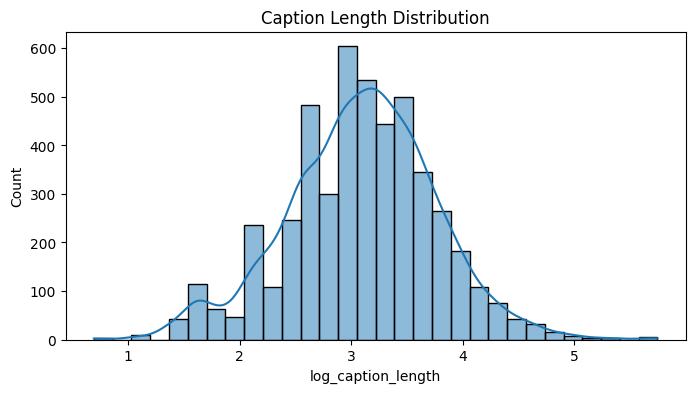

In [15]:
plt.figure(figsize=(8,4))
sns.histplot(df['log_caption_length'], bins=30, kde=True)
plt.title('Caption Length Distribution')
plt.show()

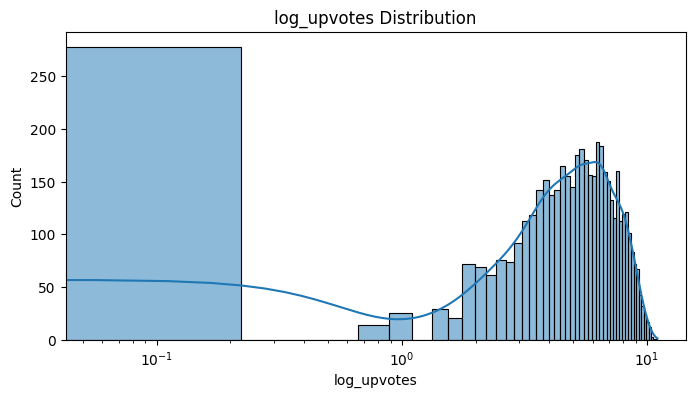

In [16]:
plt.figure(figsize=(8,4))
sns.histplot(df['log_upvotes'], bins=50, kde=True)
plt.title('log_upvotes Distribution')
plt.xscale('log')  # Upvotes likely have a long tail
plt.show()

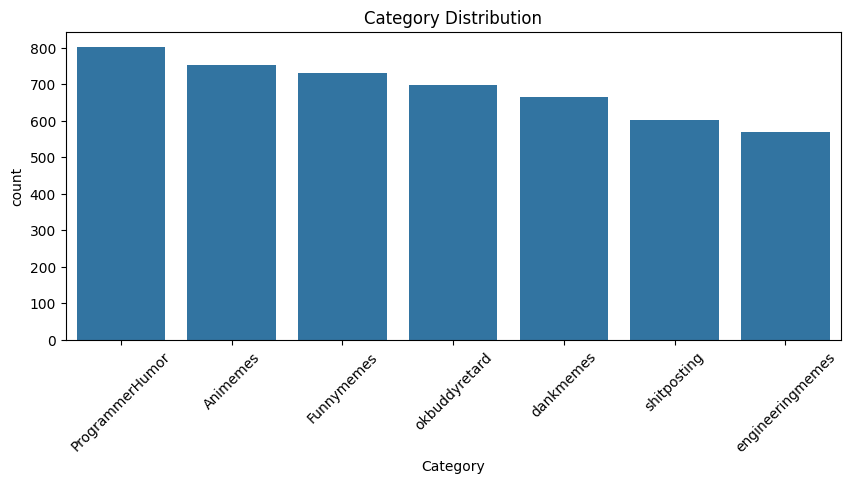

In [17]:
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='Category', order=df['Category'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Category Distribution')
plt.show()

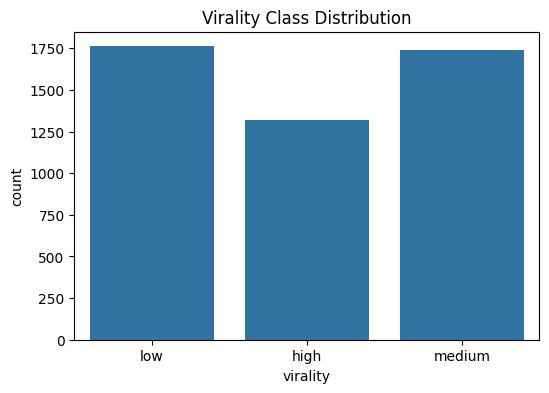

In [18]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='virality')
plt.title('Virality Class Distribution')
plt.show()


In [19]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

# Apply sentiment analysis to the meme caption (e.g., Title)
df['sentiment'] = df['Title'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

In [20]:
# Count words in caption
df['caption_length'] = df['Title'].apply(lambda x: len(x.split()))

# Bucket it into categories
def length_bucket(n):
    if n < 5:
        return 'short'
    elif n < 15:
        return 'medium'
    else:
        return 'long'

df['caption_bucket'] = df['caption_length'].apply(length_bucket)

In [21]:
df['Created Time'] = pd.to_datetime(df['Created Time'], format="%d-%m-%Y %H:%M")

def time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['Time of Day'] = df['Created Time'].dt.hour.apply(time_of_day)


In [22]:
df['log_comments'] = np.log1p(df['Number of Comments'])

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer  # In case needed later

In [24]:
num_features = ['Upvotes', 'Total Karma','Comment Karma','Upvote Ratio','Number of Comments','log_upvotes','log_caption_length','sentiment','caption_length','log_comments']
cat_features = ['Category', 'Time of Day','Title','Author','Cake Day','Post URL','Created Time','File Name','Extracted Text','virality','caption_bucket']

In [25]:
numeric_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

In [26]:
categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [27]:
preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, num_features),
    ('cat', categorical_pipeline, cat_features)
])

In [28]:
from sklearn.linear_model import LogisticRegression

model_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', LogisticRegression(multi_class='multinomial', solver='lbfgs'))
])

In [29]:
from sklearn.model_selection import train_test_split

X = df[num_features + cat_features]
y = df['virality']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [30]:
model_pipeline.fit(X_train, y_train)

/opt/homebrew/Cellar/jupyterlab/4.4.3_1/libexec/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,steps,"[('preprocessing', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [31]:
model_pipeline.predict(X_test)
model_pipeline.score(X_test, y_test)

1.0

In [32]:
X_train_transformed = preprocessor.transform(X_train)

# Convert sparse matrix to dense (if it's sparse)
if hasattr(X_train_transformed, "toarray"):
    X_train_transformed = X_train_transformed.toarray()


In [33]:
feature_names = preprocessor.get_feature_names_out()
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=feature_names)

print(X_train_transformed_df.head())


   num__Upvotes  num__Total Karma  num__Comment Karma  num__Upvote Ratio  \
0     -0.305554         -0.174452           -0.187916           0.433054   
1     -0.431137          0.148518            0.329692          -0.829263   
2     -0.430271          0.145179            1.397267          -1.397305   
3      2.827386         -0.228109           -0.318070          -0.008757   
4     -0.412083         -0.245010           -0.323228          -0.703031   

   num__Number of Comments  num__log_upvotes  num__log_caption_length  \
0                -0.405935          0.318879                -1.180208   
1                -0.405935         -1.551011                 0.771583   
2                -0.392123         -1.354721                -0.003975   
3                 3.350725          1.674134                 0.245238   
4                -0.226388         -0.442926                 0.554998   

   num__sentiment  num__caption_length  num__log_comments  ...  \
0       -0.145146            -0.334768

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4821 entries, 0 to 4820
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Title               4821 non-null   object        
 1   Author              4821 non-null   object        
 2   Total Karma         4821 non-null   int64         
 3   Comment Karma       4821 non-null   int64         
 4   Cake Day            4821 non-null   object        
 5   Post URL            4821 non-null   object        
 6   Created Time        4821 non-null   datetime64[ns]
 7   Upvotes             4821 non-null   int64         
 8   Upvote Ratio        4821 non-null   float64       
 9   Number of Comments  4821 non-null   int64         
 10  Category            4821 non-null   object        
 11  Time of Day         4821 non-null   object        
 12  File Name           4821 non-null   object        
 13  Extracted Text      4821 non-null   object      

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer # Import ColumnTransformer

# Assume df is your original DataFrame

# --- Define original lists (useful for reference, but don't use directly in preprocessor) ---
# original_all_num_features = ['Upvotes', 'Total Karma','Comment Karma','Upvote Ratio','Number of Comments','log_upvotes','log_caption_length','sentiment','caption_length','log_comments']
# original_all_cat_features = ['Category', 'Time of Day','Title','Author','Cake Day','Post URL','Created Time','File Name','Extracted Text','virality','caption_bucket']
# -----------------------------------------------------------------------------------------

# Define the *actual* feature columns you will use for the model
feature_columns = [
    'log_upvotes',
    'log_caption_length',
    'log_comments',
    'sentiment',
    'caption_bucket',     # categorical
    'Category',           # categorical
    'Time of Day'         # categorical
]

# Separate these selected features into numeric and categorical lists
# based on their type in the feature_columns list.
# You need to manually check the types of these specific columns.
# Based on your list:
num_features_selected = [col for col in feature_columns if col in ['log_upvotes', 'log_caption_length', 'log_comments', 'sentiment']]
cat_features_selected = [col for col in feature_columns if col in ['caption_bucket', 'Category', 'Time of Day']]


# Define the preprocessing pipelines using the *selected* feature lists
numeric_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, num_features_selected), # Use selected numeric features
    ('cat', categorical_pipeline, cat_features_selected) # Use selected categorical features
])


# Define X using only the selected feature_columns
X = df[feature_columns]
y = df['virality']        # target: 'low', 'medium', 'high'

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Define the model pipeline (using the preprocessor defined above)
model_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('poly', PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)),
    ('classifier', LogisticRegression(multi_class='multinomial', solver='newton-cg', max_iter=1000)) # Using newton-cg as previously discussed
])

# Fit the model pipeline
model_pipeline.fit(X_train, y_train)


/opt/homebrew/Cellar/jupyterlab/4.4.3_1/libexec/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,steps,"[('preprocessing', ...), ('poly', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model_pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))

Accuracy: 0.9886010362694301
Precision: 0.9885885630955605
Recall: 0.9879668769358131
F1 Score: 0.9882662628553502


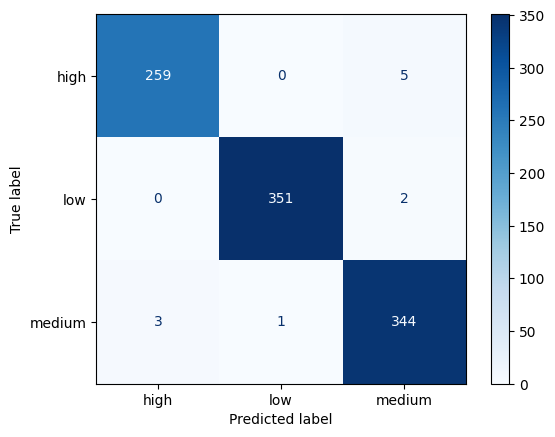

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=model_pipeline.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_pipeline.classes_)
disp.plot(cmap='Blues')

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

        high       0.99      0.98      0.98       264
         low       1.00      0.99      1.00       353
      medium       0.98      0.99      0.98       348

    accuracy                           0.99       965
   macro avg       0.99      0.99      0.99       965
weighted avg       0.99      0.99      0.99       965

